In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,NaN,1.0,3.0,1.0,1.0
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	80
float64		column 3	32
float64		column 4	18
float64		column 5	16
float64		column 6	48
float64		column 7	50
float64		column 8	16
float64		column 9	32


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,603.000000,651.000000,665.000000,667.000000,635.000000,633.000000,667.000000,651.000000
mean,4.442167,3.023217,3.164363,2.809023,3.196402,3.491339,3.374408,2.889055,1.594470
std,2.820761,2.963699,2.941327,2.856705,2.167627,3.612261,2.376795,3.062853,1.721779
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

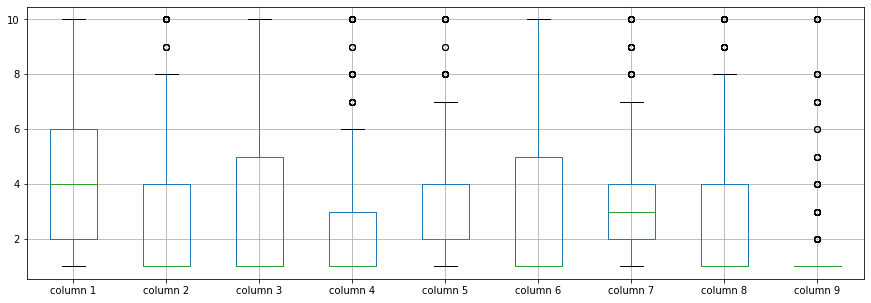

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.023217
column 3    3.164363
column 4    2.809023
column 5    3.196402
column 6    3.491339
column 7    3.374408
column 8    2.889055
column 9    1.594470
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.641056,0.650521,0.484857,0.524715,0.579001,0.542647,0.540277,0.362242
column 2,0.641056,1.000000,0.907289,0.709913,0.747740,0.694781,0.737070,0.735994,0.477101
column 3,0.650521,0.907289,1.000000,0.688953,0.723237,0.704692,0.705808,0.718044,0.431595
column 4,0.484857,0.709913,0.688953,1.000000,0.589948,0.683933,0.658710,0.597476,0.415208
column 5,0.524715,0.747740,0.723237,0.589948,1.000000,0.582527,0.594207,0.651079,0.473773
column 6,0.579001,0.694781,0.704692,0.683933,0.582527,1.000000,0.681972,0.587121,0.350193
column 7,0.542647,0.737070,0.705808,0.658710,0.594207,0.681972,1.000000,0.667422,0.292680
column 8,0.540277,0.735994,0.718044,0.597476,0.651079,0.587121,0.667422,1.000000,0.428004
column 9,0.362242,0.477101,0.431595,0.415208,0.473773,0.350193,0.292680,0.428004,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+45,9+45+45,9+45+45,9+45+45+45+45,9+45+45+45+45+45,9+45+45+45+45+45+45,9+45+45+45+45+45,9+45+45+45+45,9+45+45+45,9+45+45,9+45,9], vae_layer = False, seed = 450)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.99026466551281
Epoch: 1 , loss: 34.77662572406587
Epoch: 2 , loss: 34.21465294701712
Epoch: 3 , loss: 31.47307468595959
Epoch: 4 , loss: 30.540108771551225
Epoch: 5 , loss: 29.982506343296595
Epoch: 6 , loss: 29.701046171642485
Epoch: 7 , loss: 29.20264498392741
Epoch: 8 , loss: 28.418705349876767
Epoch: 9 , loss: 28.51466619400751
Epoch: 10 , loss: 28.643933296203613
Epoch: 11 , loss: 28.223068668728782
Epoch: 12 , loss: 28.005242166065035
Epoch: 13 , loss: 27.675161724998837
Epoch: 14 , loss: 27.40409987313407
Epoch: 15 , loss: 27.555808521452406
Epoch: 16 , loss: 27.92104793730236
Epoch: 17 , loss: 26.95705286661784
Epoch: 18 , loss: 26.956193560645694
Epoch: 19 , loss: 26.71831630525135
Epoch: 20 , loss: 26.67499760219029
Epoch: 21 , loss: 26.527825446355912
Epoch: 22 , loss: 26.95072196778797
Epoch: 23 , loss: 26.11201340811593
Epoch: 24 , loss: 25.654087475367955
Epoch: 25 , loss: 26.1651022774

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    0.698449
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.000000,0.0,0.0,-0.05855,0.0,0.0,0.0,0.000000
1,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
2,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
3,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
4,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
679,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
680,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
681,0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,-0.434024


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(61.967432072408414, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.18479636530728735

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.000000,1.0,1.0,1.94145,1.0,3.0,1.0,1.000000
1,5,4.000000,4.0,5.0,7.00000,10.0,3.0,2.0,1.000000
2,3,1.000000,1.0,1.0,2.00000,2.0,3.0,1.0,1.000000
3,6,8.000000,8.0,1.0,3.00000,4.0,3.0,7.0,1.000000
4,4,1.000000,1.0,3.0,2.00000,1.0,3.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,1.0,1.0,2.00000,1.0,2.0,1.0,1.000000
679,2,1.000000,1.0,1.0,2.00000,1.0,3.0,1.0,1.000000
680,5,10.000000,10.0,10.0,4.00000,10.0,5.0,6.0,3.000000
681,1,1.000000,1.0,3.0,2.00000,1.0,1.0,1.0,0.565976


In [20]:
imputations[-1].to_excel("BCW_NW_5(imp).xlsx", index=False, header=False)